In [ ]:
!unzip correlation_data.zip

Archive:  correlation_data.zip
replace correlation_data/correlation_data_EA/correlation_data_EA_INDIA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: correlation_data/correlation_data_EA/correlation_data_EA_INDIA.csv  
  inflating: correlation_data/correlation_data_EA/correlation_data_EA_LA.csv  
  inflating: correlation_data/correlation_data_EA/correlation_data_EA_MEA.csv  
  inflating: correlation_data/correlation_data_EA/correlation_data_EA_NE.csv  
  inflating: correlation_data/correlation_data_INDIA/correlation_data_INDIA_EA.csv  
  inflating: correlation_data/correlation_data_INDIA/correlation_data_INDIA_LA.csv  
  inflating: correlation_data/correlation_data_INDIA/correlation_data_INDIA_MEA.csv  
  inflating: correlation_data/correlation_data_INDIA/correlation_data_INDIA_NE.csv  
  inflating: correlation_data/correlation_data_LA/correlation_data_LA_EA.csv  
  inflating: correlation_data/correlation_data_LA/correlation_data_LA_INDIA.csv  
  inflating: correlation_data/c

In [ ]:
import os
import pandas as pd

base_folder = 'correlation_data'
regions = ['INDIA', 'EA', 'LA', 'MEA', 'NE']
loaded_data = {}

for region in regions:
    folder_path = os.path.join(base_folder, f'correlation_data_{region}')

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Construct full file path
            file_path = os.path.join(folder_path, file_name)

            # Load CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Store the DataFrame with a key as the file name without extension
            file_key = file_name.replace('.csv', '')
            loaded_data[file_key] = df

            print(f"Loaded {file_name} from {folder_path}")


Loaded correlation_data_INDIA_NE.csv from correlation_data/correlation_data_INDIA
Loaded correlation_data_INDIA_EA.csv from correlation_data/correlation_data_INDIA
Loaded correlation_data_INDIA_LA.csv from correlation_data/correlation_data_INDIA
Loaded correlation_data_INDIA_MEA.csv from correlation_data/correlation_data_INDIA
Loaded correlation_data_EA_INDIA.csv from correlation_data/correlation_data_EA
Loaded correlation_data_EA_LA.csv from correlation_data/correlation_data_EA
Loaded correlation_data_EA_NE.csv from correlation_data/correlation_data_EA
Loaded correlation_data_EA_MEA.csv from correlation_data/correlation_data_EA
Loaded correlation_data_LA_NE.csv from correlation_data/correlation_data_LA
Loaded correlation_data_LA_INDIA.csv from correlation_data/correlation_data_LA
Loaded correlation_data_LA_EA.csv from correlation_data/correlation_data_LA
Loaded correlation_data_LA_MEA.csv from correlation_data/correlation_data_LA
Loaded correlation_data_MEA_NE.csv from correlation_dat

In [ ]:
corr_data={}
for i in regions:
  corr_data[i]={}
  for j in regions:
    if not i==j:
      filename='correlation_data_'+i+'_'+j
      corr_values=list(loaded_data[filename]['corr_value'])
      similarity_values=list(loaded_data[filename]['similarity'])

      average = sum(similarity_values)/len(similarity_values)
      range_diff = max(corr_values) - min(corr_values)
      corr_data[i][j]= average/range_diff



In [ ]:
corr_data

{'INDIA': {'EA': 0.45067543466028265,
  'LA': 0.4289540405324895,
  'MEA': 0.4931183056579791,
  'NE': 0.5100782708298388},
 'EA': {'INDIA': 0.41508775126147796,
  'LA': 0.3909661830277852,
  'MEA': 0.4199598619734977,
  'NE': 0.438951945738605},
 'LA': {'INDIA': 0.32366926094418647,
  'EA': 0.3535967003389996,
  'MEA': 0.3718533062987391,
  'NE': 0.38164546462145144},
 'MEA': {'INDIA': 0.4093184742678331,
  'EA': 0.4138801719509076,
  'LA': 0.3954500387455007,
  'NE': 0.47954398402897325},
 'NE': {'INDIA': 0.4274871849495432,
  'EA': 0.40473497175652046,
  'LA': 0.39726382282176037,
  'MEA': 0.4535454206669283}}

In [ ]:
corr_data

{'INDIA': {'EA': 0.5812062654309532,
  'LA': 0.6289482993437113,
  'MEA': 0.7059452437529465,
  'NE': 0.6898516887940512},
 'EA': {'INDIA': 0.4753259884839922,
  'LA': 0.5025590131047479,
  'MEA': 0.5327044579912745,
  'NE': 0.54753967145031},
 'LA': {'INDIA': 0.40684130463839363,
  'EA': 0.4475092243808041,
  'MEA': 0.48163695614706276,
  'NE': 0.4719227833891385},
 'MEA': {'INDIA': 0.48263622905536974,
  'EA': 0.4889089712399316,
  'LA': 0.45857331789595457,
  'NE': 0.6078678466848336},
 'NE': {'INDIA': 0.48049110943371587,
  'EA': 0.4920276717794662,
  'LA': 0.4609907407145611,
  'MEA': 0.5596356886941772}}

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'INDIA'),
  Text(0, 1.5, 'EA'),
  Text(0, 2.5, 'LA'),
  Text(0, 3.5, 'MEA'),
  Text(0, 4.5, 'NE')])

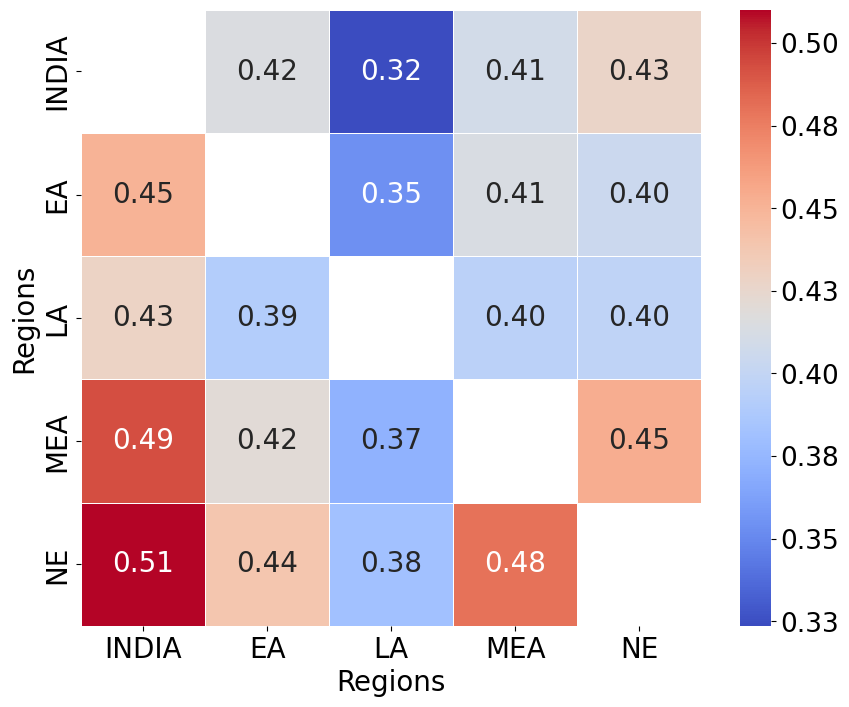

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your correlation data
data = {
    'INDIA': {'EA': 0.45067543466028265,
              'LA': 0.4289540405324895,
              'MEA': 0.4931183056579791,
              'NE': 0.5100782708298388},
    'EA': {'INDIA': 0.41508775126147796,
           'LA': 0.3909661830277852,
           'MEA': 0.4199598619734977,
           'NE': 0.438951945738605},
    'LA': {'INDIA': 0.32366926094418647,
           'EA': 0.3535967003389996,
           'MEA': 0.3718533062987391,
           'NE': 0.38164546462145144},
    'MEA': {'INDIA': 0.4093184742678331,
            'EA': 0.4138801719509076,
            'LA': 0.3954500387455007,
            'NE': 0.47954398402897325},
    'NE': {'INDIA': 0.4274871849495432,
           'EA': 0.40473497175652046,
           'LA': 0.39726382282176037,
           'MEA': 0.4535454206669283}
}

# Convert the dictionary to a pandas DataFrame
correlation_df = pd.DataFrame(data)

# Reorder the DataFrame to ensure the axes are the same
correlation_df = correlation_df.reindex(index=correlation_df.columns, columns=correlation_df.columns)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
                      annot_kws={"size": 20}, cbar_kws={'format': '%.2f'})

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=19)  # Adjust the color bar tick label font size
plt.xlabel('Regions', fontsize=20)  # Increase x-axis label font size
plt.ylabel('Regions', fontsize=20)  # Increase y-axis label font size
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)



In [ ]:
# Initialize corr_data dictionary to hold group-wise calculations
corr_data = {}

for i in regions:
    corr_data[i] = {}
    for j in regions:
        if not i == j:
            filename = 'correlation_data_' + i + '_' + j
            corr_values = list(loaded_data[filename]['corr_value'])
            similarity_values = list(loaded_data[filename]['similarity'])
            group_values = list(loaded_data[filename]['group'])  # The 'group' column

            # Initialize group-wise dictionaries
            group_data = {'business': [], 'visits': [], 'travel': [], 'dining': []}

            # Categorize data by group
            for idx, group in enumerate(group_values):
                group_data[group].append((corr_values[idx], similarity_values[idx]))

            # Initialize dictionary for region pair
            corr_data[i][j] = {}

            # Calculate metrics for each group
            for group, values in group_data.items():
                if values:  # Check if there are values for the group
                    group_corr_values = [v[0] for v in values]
                    group_similarity_values = [v[1] for v in values]

                    average_similarity = sum(group_similarity_values) / len(group_similarity_values)
                    range_diff = max(group_corr_values) - min(group_corr_values)

                    # Store the result in corr_data for this group
                    corr_data[i][j][group] = average_similarity / range_diff if range_diff != 0 else None
                else:
                    corr_data[i][j][group] = None  # No data for this group

In [ ]:
corr_data

{'INDIA': {'EA': {'business': 0.585773717230187,
   'visits': 0.622097241701774,
   'travel': 0.5752238104061606,
   'dining': 0.6118031840146916},
  'LA': {'business': 0.6667059546653663,
   'visits': 0.6934222809066849,
   'travel': 0.8350946800047648,
   'dining': 0.724008868728926},
  'MEA': {'business': 0.6784427983675868,
   'visits': 0.7635067427364127,
   'travel': 0.8189261952154161,
   'dining': 0.7382336134267171},
  'NE': {'business': 0.7410397850709307,
   'visits': 0.7880184567100074,
   'travel': 0.7066897181422889,
   'dining': 0.6193995221466954}},
 'EA': {'INDIA': {'business': 0.4858342400731037,
   'visits': 0.5686253674456533,
   'travel': 0.4500431467449762,
   'dining': 0.4137186249674274},
  'LA': {'business': 0.5347048490718563,
   'visits': 0.533594644811718,
   'travel': 0.5591032606332679,
   'dining': 0.5373612751177941},
  'MEA': {'business': 0.5209274844556006,
   'visits': 0.5661715929616892,
   'travel': 0.6054302740028537,
   'dining': 0.526102574874420